In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Null Hypothesis: The woman has an equal chance of discriminating between milk and tea, similiar to flipping a coin. 

Alternate Hypothesis: The woman has a higher chance of discriminating whether milk or tea was added first.

X: test statistic: # of times she correctly chose tea first

Hypergeometric distribution: sampling without replacement
(M - total # of cups she can choose from
n - # of tea first cups she can choose from
N - # of trials)

X~Hypergeom(M=8,n=4,N=4)

In [2]:
M,n,N = 8,4,4
stats.hypergeom.rvs(M,n,N,size=1)

array([3])

p-value = P(X >= 3) = 1 - P(X =< 2)

In [3]:
M,n,N = 8,4,4
p_value = 1 - stats.hypergeom.cdf(2,M,n,N)
p_value

0.24285714285714288

Conclusion:

We fail to reject the null hypothesis because we don't have enough evidence to show her chance of picking correctly.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [4]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State hypothesis

null hypothesis: There is no difference is the mean sepal width between iris species versicolor and verginica.

alternate hypothesis: One iris species has a larger mean sepal width than that of another.

Step 2: Determine the test statistic

Test Statistic: the difference in the sample mean between versicolor and virginica

In [5]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

Is this difference close to zero?

Steo 3: Compute P-Value

If the null hypothesis is true, then the distribution should be close to zero.

In [10]:
#distribution
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000):
    iris_sample = iris_sub.with_column('sampled', iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts = np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

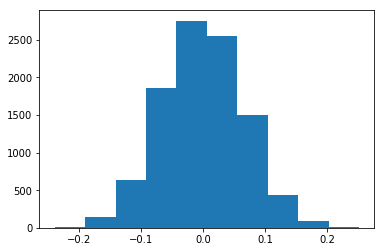

In [11]:
plt.hist(ts)
plt.show()

Step 4: Conclusion

Based off the histogram plot, the sepal with difference did not closely stay to 0. Therefore, reject the null hypothesis. This is also enough evidence to assume the alternate hypothesis is true, one iris species has a larger sepal width than that of another.